In [2]:
import pandas as pd
import glob
import os

In [3]:
# Caminho para o diretório com seus arquivos Parquet
parquet_dir = '../data/ds_market/'

# Obter a lista de todos os arquivos Parquet
parquet_files = glob.glob(os.path.join(parquet_dir, 'part.*.parquet'))

# Carregar e concatenar todos os arquivos Parquet em um único DataFrame
df_list = [pd.read_parquet(f) for f in parquet_files]
df = pd.concat(df_list, ignore_index=True)

In [4]:
print(df.head())
print(df.info())
print(df.describe())

                          id                 item     category_x  \
0  HOME_&_GARDEN_1_155_BOS_2  HOME_&_GARDEN_1_155  HOME_&_GARDEN   
1  HOME_&_GARDEN_1_159_BOS_2  HOME_&_GARDEN_1_159  HOME_&_GARDEN   
2  HOME_&_GARDEN_1_166_BOS_2  HOME_&_GARDEN_1_166  HOME_&_GARDEN   
3  HOME_&_GARDEN_1_198_BOS_2  HOME_&_GARDEN_1_198  HOME_&_GARDEN   
4  HOME_&_GARDEN_1_239_BOS_2  HOME_&_GARDEN_1_239  HOME_&_GARDEN   

        department    store store_code  region     d  sales yearweek  \
0  HOME_&_GARDEN_1  Roxbury      BOS_2  Boston  d_77      0   201115   
1  HOME_&_GARDEN_1  Roxbury      BOS_2  Boston  d_77      0   201115   
2  HOME_&_GARDEN_1  Roxbury      BOS_2  Boston  d_77      3   201115   
3  HOME_&_GARDEN_1  Roxbury      BOS_2  Boston  d_77      7   201115   
4  HOME_&_GARDEN_1  Roxbury      BOS_2  Boston  d_77      0   201115   

        date event     category_y  sell_price  
0 2011-04-15  <NA>           <NA>         NaN  
1 2011-04-15  <NA>           <NA>         NaN  
2 2011-04-15  

In [5]:
missing_values = df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)

Valores faltantes por coluna:
 id                   0
item                 0
category_x           0
department           0
store                0
store_code           0
region               0
d                    0
sales                0
yearweek             0
date                 0
event         57561115
category_y    12513532
sell_price    12513532
dtype: int64


In [6]:
print(df['sales'].describe())
print(df['sell_price'].describe())

count    5.835424e+07
mean     1.126352e+00
std      3.872972e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.630000e+02
Name: sales, dtype: float64
count    4.584070e+07
mean     5.515591e+00
std      4.381002e+00
min      1.200000e-02
25%      2.620100e+00
50%      4.200000e+00
75%      7.176000e+00
max      1.341500e+02
Name: sell_price, dtype: float64


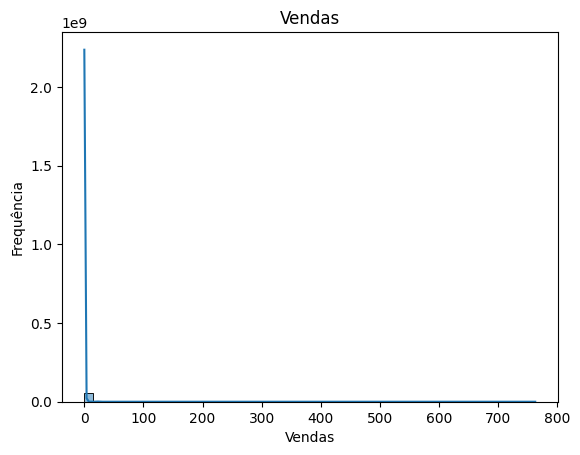

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['sales'], bins=50, kde=True)
plt.title('Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()


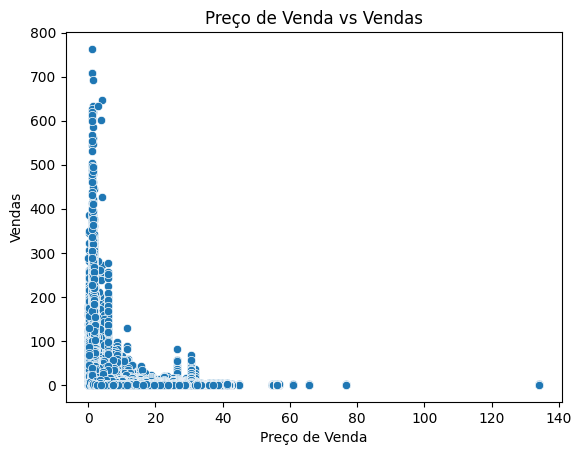

In [9]:
sns.scatterplot(x='sell_price', y='sales', data=df)
plt.title('Preço de Venda vs Vendas')
plt.xlabel('Preço de Venda')
plt.ylabel('Vendas')
plt.show()


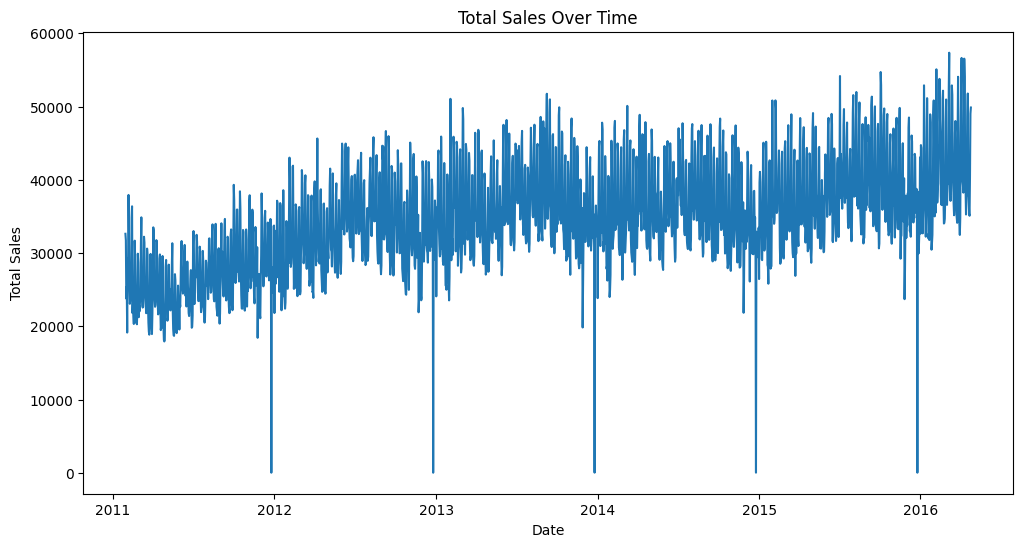

In [10]:
# Vendas no tempo
sales_over_time = df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_over_time['date'], sales_over_time['sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [11]:
correlation = df[['sell_price', 'sales']].corr()
print("Correlação entre preço e vendas:\n", correlation)


Correlação entre preço e vendas:
             sell_price    sales
sell_price     1.00000 -0.15108
sales         -0.15108  1.00000


Top 10 Itens por Vendas:
 item
SUPERMARKET_3_090    1004721
SUPERMARKET_3_586     920242
SUPERMARKET_3_252     565299
SUPERMARKET_3_555     491287
SUPERMARKET_3_714     396172
SUPERMARKET_3_587     396119
SUPERMARKET_3_694     390001
SUPERMARKET_3_226     363082
SUPERMARKET_3_202     295983
SUPERMARKET_3_723     284333
Name: sales, dtype: int32


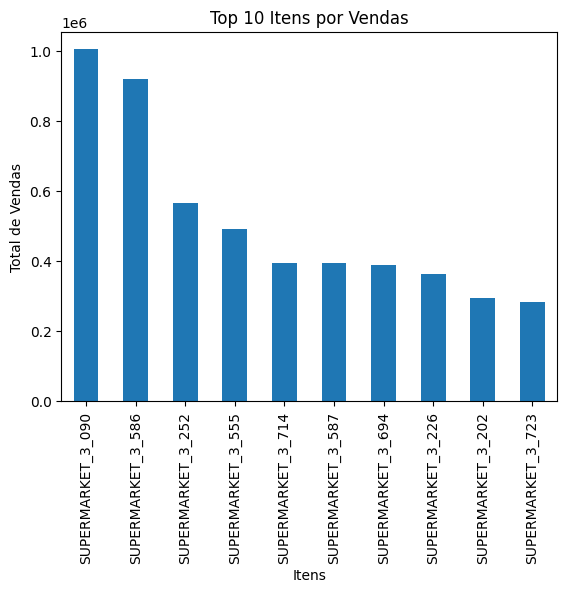

In [12]:
# Top 10 Itens por Vendas
top_items = df.groupby('item')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Itens por Vendas:\n", top_items)

# Plotting
top_items.plot(kind='bar')
plt.title('Top 10 Itens por Vendas')
plt.xlabel('Itens')
plt.ylabel('Total de Vendas')
plt.show()


Vendas no eventos:
 event
Easter            197813
NewYear           128851
Ramadan starts    173910
SuperBowl         245613
Thanksgiving      105733
Name: sales, dtype: int32


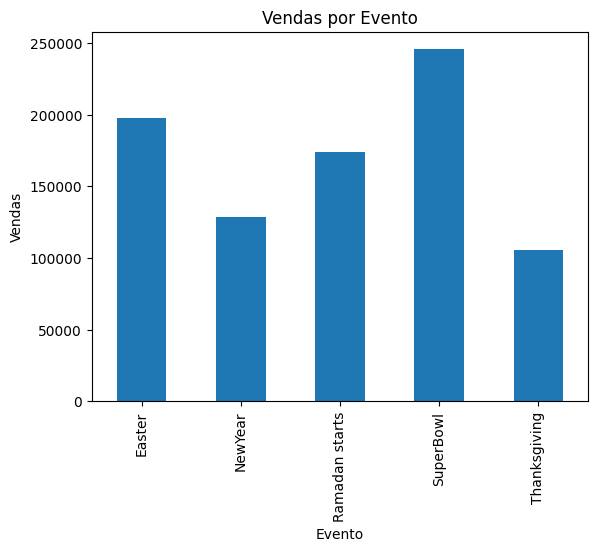

In [13]:
# Impacto dos eventos nas vendas
event_sales = df[df['event'].notnull()].groupby('event')['sales'].sum()
print("Vendas no eventos:\n", event_sales)

# Plotting
event_sales.plot(kind='bar')
plt.title('Vendas por Evento')
plt.xlabel('Evento')
plt.ylabel('Vendas')
plt.show()


In [14]:
# Interquartile Range (IQR)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['sales'] < Q1 - 1.5 * IQR) | (df['sales'] > Q3 + 1.5 * IQR)]
print("Outliers nas vendas:", len(outliers))


Outliers nas vendas: 6906241
